### Exercício 02 – Previsão de Vendas

> Construa um modelo que preveja vendas com base no dinheiro gasto em
diferentes plataformas de marketing

> Use o conjunto de dados de publicidade fornecido no ISLR e analise a relação
entre 'publicidade na TV' e 'vendas' usando um modelo de regressão linear
simples

> Neste caderno, construiremos um modelo de regressão linear para prever
vendas usando uma variável preditora apropriada.

### 1. Importe as bibliotecas:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 2. Carregue os dados do arquivo advertising.csv para um dataframe.

In [10]:
df_advertising = pd.read_csv('./archives/advertising.csv')

### 3. Visualizar algumas informações básicas do dataframe:


In [11]:
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [75]:
df_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 4. Limpeza e análise exploratória dos dados:

In [12]:
# Resumo estatístico do dataframe;
df_advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


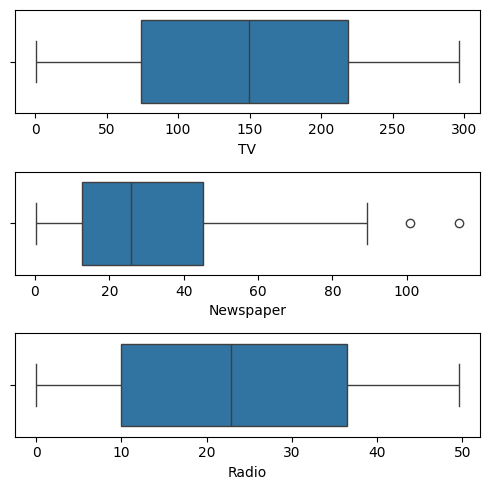

In [52]:
'''
Analise se há outliers no conjunto de dados. Crie o seguinte comando
para analisarmos os dados:
'''
fig, axs = plt.subplots(3, figsize=(5, 5))

plt1 = sns.boxplot(df_advertising['TV'], ax=axs[0], orient='h')
plt2= sns.boxplot(df_advertising['Newspaper'], ax=axs[1], orient='h')
plt3 = sns.boxplot(df_advertising['Radio'], ax=axs[2], orient='h')

plt.tight_layout()

plt.show()

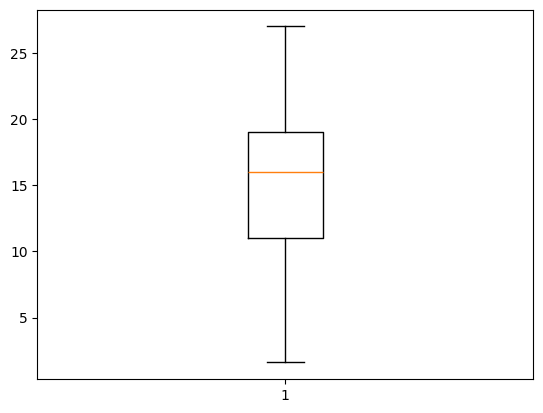

In [21]:
'''
Análise univariada da coluna sales. Utilize o comando plt.boxplot para
exibir o comportamento dos dados
'''
plt.boxplot(x=df_advertising['Sales'])

plt.show()

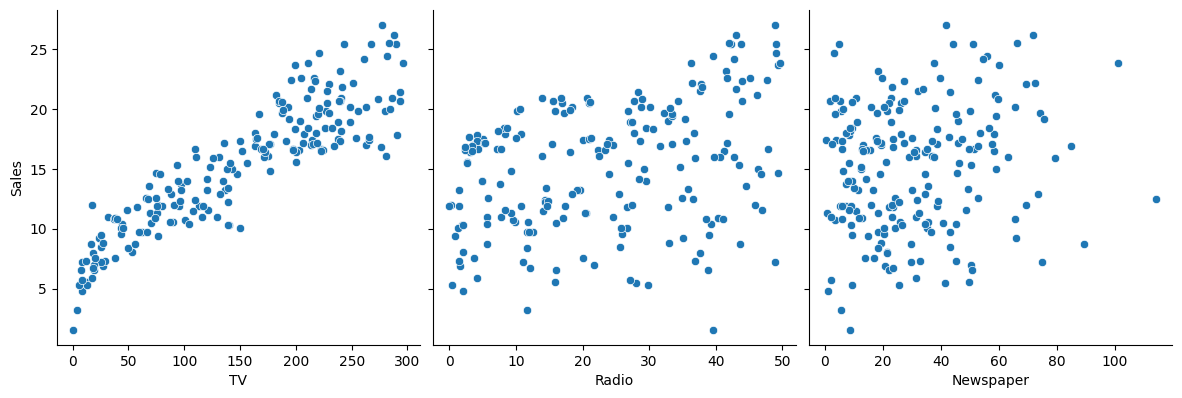

In [33]:
'''
Verifique como as variáveis se relacionam, utilizando o gráfico de
dispersão
'''
sns.pairplot(data=df_advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')

plt.show()

<Axes: >

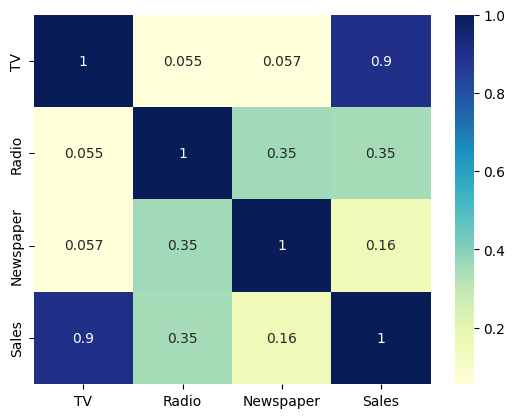

In [34]:
'''
Verifique a correlação existente entre as variáveis, utilizando o gráfico
mapa de calor.
'''
sns.heatmap(df_advertising.corr(), cmap='YlGnBu', annot=True)

### 5. Separação dos dados em treino e teste:


In [44]:
'''
Selecione a variável que têm maior correlação com as vendas e
atribua ela à variável X.
'''
x = df_advertising[['TV']].values
y = df_advertising[['Sales']].values
'''
Separe os dados em treino e teste, utilizando o comando
train_teste_split. Adote como tamanho da amostra de treino como
sendo 30% e Random_state igual a 0;
'''    
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=42)

# Analise o tamanho das variáveis de treino e teste.
print(f'x_train: {len(x_train)} | x_test: {len(x_test)} = {len(x)}')

x_train: 150 | x_test: 50 = 200


### 6. Treinamento do modelo e Deploy:


In [45]:
'''
Crie o modelo de regressão linear simples. modelo =
LinearRegression ();
'''
model = LinearRegression()

In [46]:
'''
Treino o modelo com as variáveis X_train e y_train.
modelo.fit(X_train, y_train);
'''
model.fit(x_train, y_train)

LinearRegression()

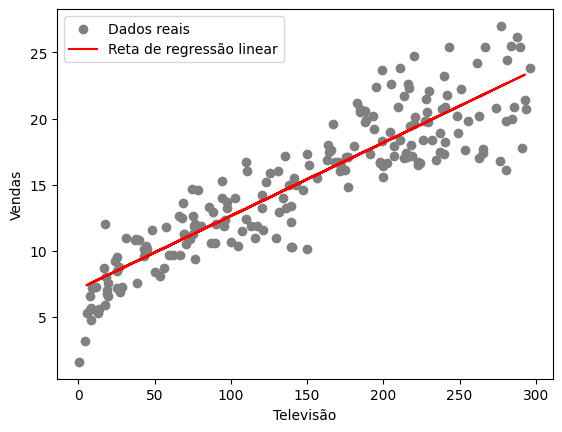

In [72]:
'''
Visualize a reta de regressão linear (previsões) e os dados reais
utilizados no treinamento.
'''
plt.scatter(x, y, color='gray', label='Dados reais')

plt.plot(x_test, model.predict(x_test), color='red', label='Reta de regressão linear')

plt.xlabel('Televisão')

plt.ylabel('Vendas')

plt.legend(loc='upper left')

plt.show()

In [78]:
# Faça três testes com os valores a seguir: 48, 65 e 73.
print(f'{model.predict([[230]]).round(1)[0][0]}')
print(f'{model.predict([[180]]).round(1)[0][0]}')
print(f'{model.predict([[17]]).round(1)[0][0]}')

19.8
17.1
8.0


In [81]:
from modules import inputFloat

In [87]:
'''
Crie um código para solicitar ao usuário a inserção da quantidade
horas estudadas e retorne a previsão do salário
'''
value = inputFloat('Informe o valor gasto em marketing nas TV\'s?: R$')

print(f'R${value:,.2f} emx marketing nas TV\'s, renderá: {model.predict([[value]]).round(1)[0][0]}');

R$58,000.00 em marketing nas TV's, renderá: 3219.5
